In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_text

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# DATA IMPORT

In [ ]:
df1 = pd.read_csv("/content/drive/My Drive/Joseph@RMC/DA/data/feul_cons_2005-14.csv")
df2 = pd.read_csv("/content/drive/My Drive/Joseph@RMC/DA/data/feul_cons_2015-19.csv")
df3 = pd.read_csv("/content/drive/My Drive/Joseph@RMC/DA/data/feul_cons_2020.csv")
df4 = pd.read_excel("/content/drive/My Drive/Joseph@RMC/DA/data/fuel_cons_2021.xlsx")
df5 = pd.read_csv("/content/drive/My Drive/Joseph@RMC/DA/data/feul_cons_2022.csv")
df6 = pd.read_excel("/content/drive/My Drive/Joseph@RMC/DA/data/fuel_cons_2023.xlsx")
df7 = pd.read_excel("/content/drive/My Drive/Joseph@RMC/DA/data/fuel_cons_2024.xlsx")

# DATA CLEANING

In [ ]:
# dropping irrelevant columns
df2.drop("_id", axis = 1, inplace = True)
df7.drop("_id", axis = 1, inplace = True)

In [ ]:
assert(df1.shape[1] == df2.shape[1] == df3.shape[1] == df4.shape[1] == df5.shape[1] == df6.shape[1])

In [ ]:
df1.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)', 'CO2 rating', 'Smog rating'],
      dtype='object')

In [ ]:
df1.columns = ['year', 'manufacturer', 'model_name', 'class', 'engine_size', 'cylinders', 'transmission', 'fuel_type',\
               'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating', 'comb_fuel_cons_rating_mpg',\
               'co2_emission','co2_rating', 'smog_rating']
df2.columns = ['year', 'manufacturer', 'model_name', 'class', 'engine_size', 'cylinders', 'transmission', 'fuel_type',\
               'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating', 'comb_fuel_cons_rating_mpg',\
               'co2_emission','co2_rating', 'smog_rating']
df3.columns = ['year', 'manufacturer', 'model_name', 'class', 'engine_size', 'cylinders', 'transmission', 'fuel_type',\
               'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating', 'comb_fuel_cons_rating_mpg',\
               'co2_emission','co2_rating', 'smog_rating']
df4.columns = ['year', 'manufacturer', 'model_name', 'class', 'engine_size', 'cylinders', 'transmission', 'fuel_type',\
               'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating', 'comb_fuel_cons_rating_mpg',\
               'co2_emission','co2_rating', 'smog_rating']
df5.columns = ['year', 'manufacturer', 'model_name', 'class', 'engine_size', 'cylinders', 'transmission', 'fuel_type',\
               'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating', 'comb_fuel_cons_rating_mpg',\
               'co2_emission','co2_rating', 'smog_rating']
df6.columns = ['year', 'manufacturer', 'model_name', 'class', 'engine_size', 'cylinders', 'transmission', 'fuel_type',\
               'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating', 'comb_fuel_cons_rating_mpg',\
               'co2_emission','co2_rating', 'smog_rating']
df7.columns = ['year', 'manufacturer', 'model_name', 'class', 'engine_size', 'cylinders', 'transmission', 'fuel_type',\
               'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating', 'comb_fuel_cons_rating_mpg',\
               'co2_emission','co2_rating', 'smog_rating']

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis = 0, ignore_index = True, join = "inner")

assert(df.shape[1] == df1.shape[1])

In [ ]:
df.replace({np.nan : "Unknown"}, inplace = True)

In [ ]:
indexes = np.where(df['model_name'] == "Unknown")
indexes

(array([19716, 19717, 19718, 19719, 19720, 19721, 19722, 19723, 19724,
        19725, 19726, 19727, 19728, 19729, 19730, 19731, 19732, 19733,
        19734, 19735, 19736, 19737, 19738]),)

In [ ]:
df.drop([19716, 19717, 19718, 19719, 19720, 19721, 19722, 19723, 19724,
        19725, 19726, 19727, 19728, 19729, 19730, 19731, 19732, 19733,
        19734, 19735, 19736, 19737, 19738], axis = 0, inplace = True)


In [ ]:
indexes = np.where(df['model_name'] == "Unknown")
df.drop(["co2_rating", "smog_rating"], axis = 1, inplace = True)

In [ ]:
df.shape

(20464, 13)

In [ ]:
df.replace({'Sport utility vehicle' : 'SUV_std',\
            'Sport utility vehicle: Standard' : 'SUV_std',\
            'SUV: Standard' : 'SUV_std',\
            'Véhicule utilitaire sport : ordinaire' : 'SUV_std',\
            'Sport utility vehicle: Small' : 'SUV_small',\
            'SUV: Small' : 'SUV_small',\
            'Véhicule utilitaire sport : petit' : 'SUV_small',\
            'Sous-compacte' : 'subcompact',\
            'Subcompact' : 'subcompact',\
            'Minicompacte' : 'minicompact'}, inplace = True)

In [ ]:
df.replace({'Pickup truck: Standard' : 'pickup_truck_std',\
           'Pickup truck: Small' : 'pickup_truck_small',\
           'Station wagon: Small' : 'station_wagon_small',\
            'Deux places' : 'two_seater',\
            'Two-seater' : 'two_seater',\
            'Compact' : 'compact',\
            'Compacte' : 'compact',\
            'Station wagon: Mid-size' : 'station_wagon_mid',\
            'Special purpose vehicle' : 'special_purpose_veh',\
            'Véhicule à usage spécial ' : 'special_purpose_veh',\
            'Van: Passenger' : 'van_pass',\
            'Van: Cargo' : 'van_cargo',\
            'Intermédiaire' : 'intermediate',\
            'Camionnette : petite' : 'van_small',\
            'Camionnette : ordinaire' : 'van',\
            'Fourgonnette' : 'van',\
            'Fourgon : passager' : 'van_pass',\
            'Familiale : intermédiaire' : 'fam_intermediate',\
            'Familiale : petite' : 'fam_small',\
            'Grande berline' : 'sedan_large',\
            'Minicompact' : 'minicompact',\
            'Minivan' : 'minivan'}, inplace = True)

df['class'].value_counts()

class
SUV_std                3391
Mid-size               2615
compact                2581
SUV_small              2145
subcompact             1757
pickup_truck_std       1725
Full-size              1377
two_seater             1234
minicompact             954
station_wagon_small     767
pickup_truck_small      486
minivan                 301
station_wagon_mid       229
van_pass                222
van_cargo               212
van                     122
special_purpose_veh     119
intermediate            116
sedan_large              65
fam_small                20
van_small                17
fam_intermediate          9
Name: count, dtype: int64

In [ ]:
#clubbing as per gross vehicle ratings and interior volume on Canada website
#https://ressources-naturelles.canada.ca/efficacite-energetique/efficacite-energetique-transports-carburants-remplacement/vehicules-personnels/choisir-bon-vehicule/achat-dun-vehicule-electrique/explication-des-tableaux/21384?_gl=1*14voqlf*_ga*NTMwNDI5MjQxLjE3MTYyMTkzNDA.*_ga_C2N57Y7DX5*MTcxNjIzMzUxMy4zLjAuMTcxNjIzMzUxMy4wLjAuMA..

#Cars ========> Interior Volume
#Light Trucks ==========> Gross Vehicle Ratings

'''df.replace({'SUV_small' : 'van_small', # <2,722 kg
            'van_cargo' : 'van',       # <3,856 kg
            'special_purpose_veh' : 'van', # <3,856 kg
            'fam_small' : 'fam',     # <4,530 L
            'fam_intermediate' : 'fam', # <4,530 L
            'sedan_large' : 'sedan', # >3,115 L
            'intermediate' : 'sedan', # >3,115 L
            }, inplace = True)'''

"df.replace({'SUV_small' : 'van_small', # <2,722 kg\n            'van_cargo' : 'van',       # <3,856 kg\n            'special_purpose_veh' : 'van', # <3,856 kg\n            'fam_small' : 'fam',     # <4,530 L\n            'fam_intermediate' : 'fam', # <4,530 L\n            'sedan_large' : 'sedan', # >3,115 L\n            'intermediate' : 'sedan', # >3,115 L\n            }, inplace = True)"

In [ ]:
df['class'].value_counts()

class
SUV_std                3391
Mid-size               2615
compact                2581
SUV_small              2145
subcompact             1757
pickup_truck_std       1725
Full-size              1377
two_seater             1234
minicompact             954
station_wagon_small     767
pickup_truck_small      486
minivan                 301
station_wagon_mid       229
van_pass                222
van_cargo               212
van                     122
special_purpose_veh     119
intermediate            116
sedan_large              65
fam_small                20
van_small                17
fam_intermediate          9
Name: count, dtype: int64

In [ ]:
len(df['class'].unique())

22

# DATA PREPROCESSING

## Feature Transformation

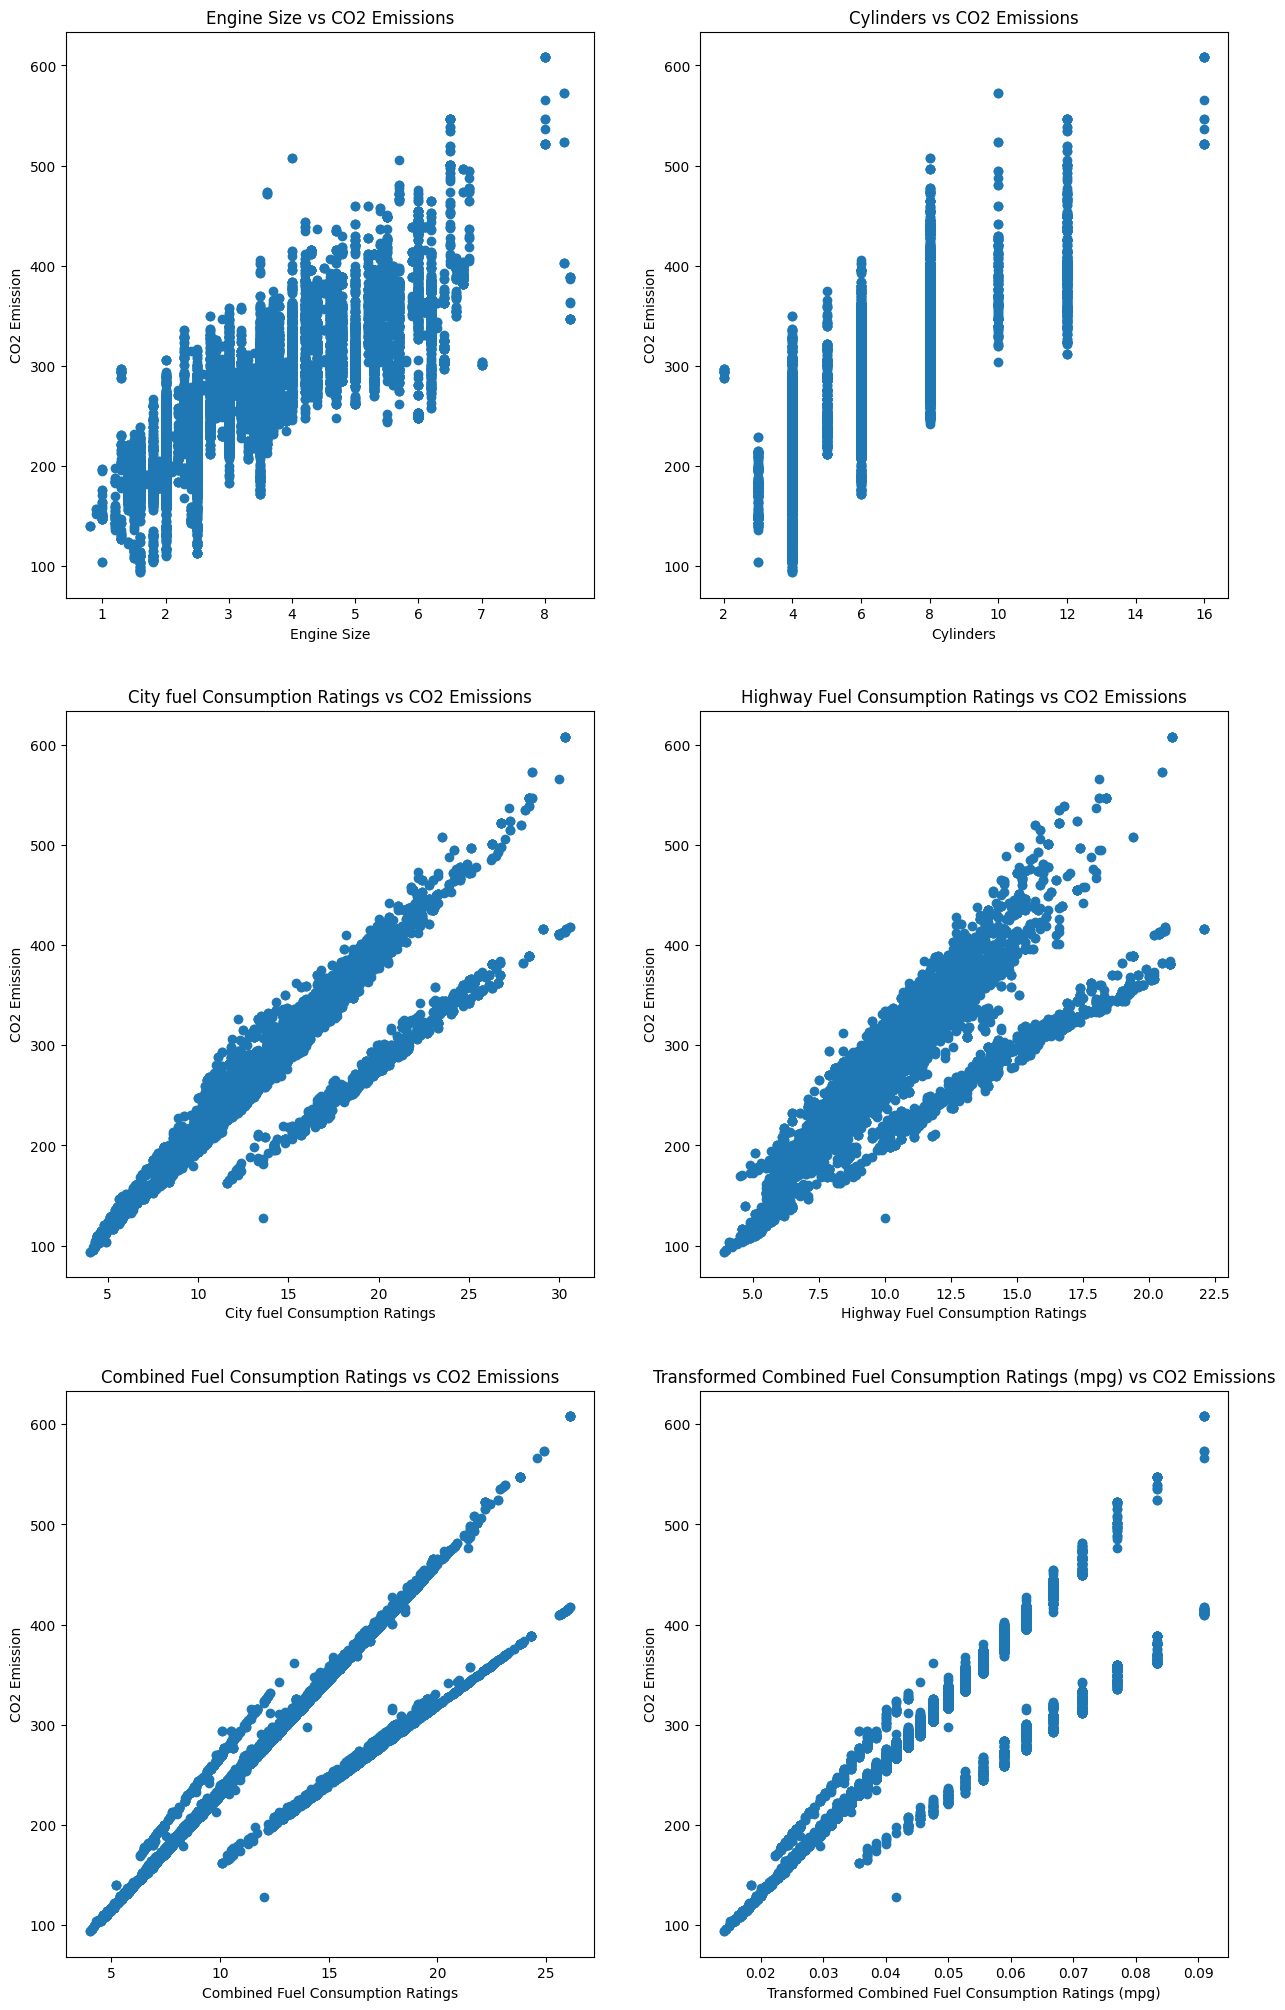

In [ ]:
#for fitting a regression model, there needs to be a linear function, there's a log function that can be seen with the combine fuel consumption
#rating so we take the reciprocal of that column and create a new column and plot it. now there's a linear relationship that can be found within
#the column and CO2 emissions.
df['log_comb_fuel_cons_rating_mpg'] = np.reciprocal(df['comb_fuel_cons_rating_mpg'])

num_features = ['engine_size', 'cylinders', 'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating',\
                'log_comb_fuel_cons_rating_mpg']
titles = ['Engine Size vs CO2 Emissions', 'Cylinders vs CO2 Emissions', 'City fuel Consumption Ratings vs CO2 Emissions', 'Highway Fuel Consumption Ratings vs CO2 Emissions', 'Combined Fuel Consumption Ratings vs CO2 Emissions',\
          'Transformed Combined Fuel Consumption Ratings (mpg) vs CO2 Emissions']
categories = ['Engine Size', 'Cylinders', 'City fuel Consumption Ratings', 'Highway Fuel Consumption Ratings', 'Combined Fuel Consumption Ratings',\
          'Transformed Combined Fuel Consumption Ratings (mpg)']

scatter = df.drop(["comb_fuel_cons_rating_mpg"], axis = 1)

plt.figure(figsize = (15,25))
for i in range(1,len(num_features)+1):
  plt.subplot(3,2,i)
  plt.title(f'{titles[i-1]}')
  plt.scatter(scatter[num_features[i-1]],scatter['co2_emission'])
  plt.xlabel(f'{categories[i-1]}')
  plt.ylabel('CO2 Emission')


### Interpretation

The scatter plots in the image show the relationships between various features (Engine Size, Cylinders, City Fuel Consumption Ratings, Highway Fuel Consumption Ratings, Combined Fuel Consumption Ratings, Transformed Combined Fuel Consumption Ratings (mpg)) and the target variable CO2 Emissions for lightweight vehicles. Let's interpret each scatter plot:

1. Engine Size vs CO2 Emissions
Description: This scatter plot shows the relationship between engine size (in liters) and CO2 emissions (in grams per kilometer).

  Interpretation: There is a clear positive correlation between engine size and CO2 emissions. As the engine size increases, CO2 emissions tend to increase. Larger engines typically consume more fuel, leading to higher emissions.

2. Cylinders vs CO2 Emissions
Description: This scatter plot illustrates the relationship between the number of cylinders in the engine and CO2 emissions.

  Interpretation: There is a positive correlation between the number of cylinders and CO2 emissions. Vehicles with more cylinders generally produce higher CO2 emissions. This is consistent with the fact that more cylinders usually mean a larger engine and higher fuel consumption.

3. City Fuel Consumption Ratings vs CO2 Emissions
Description: This plot shows the relationship between city fuel consumption ratings (in liters per 100 kilometers) and CO2 emissions.

  Interpretation: There is a strong positive correlation between city fuel consumption ratings and CO2 emissions. Higher city fuel consumption ratings (indicating less fuel efficiency in city driving) are associated with higher CO2 emissions.

4. Highway Fuel Consumption Ratings vs CO2 Emissions
Description: This scatter plot depicts the relationship between highway fuel consumption ratings and CO2 emissions.
  
  Interpretation: Similar to the city fuel consumption ratings, there is a positive correlation. Vehicles with higher highway fuel consumption ratings tend to have higher CO2 emissions. This indicates that less efficient vehicles on the highway also produce more CO2.

5. Combined Fuel Consumption Ratings vs CO2 Emissions
Description: This plot shows the relationship between combined fuel consumption ratings (a combination of city and highway ratings) and CO2 emissions.
  
  Interpretation: There is a strong positive correlation between combined fuel consumption ratings and CO2 emissions. Higher combined fuel consumption ratings are associated with higher CO2 emissions, reinforcing the idea that overall fuel efficiency is a strong predictor of emissions.
6. Transformed Combined Fuel Consumption Ratings (mpg) vs CO2 Emissions
Description: This scatter plot shows the relationship between the transformed combined fuel consumption ratings in miles per gallon (mpg) and CO2 emissions.
  
  Interpretation: There is a strong negative correlation between the transformed combined fuel consumption ratings and CO2 emissions. As the mpg increases (indicating better fuel efficiency), CO2 emissions decrease. This inverse relationship highlights the importance of fuel efficiency in reducing emissions.

---
Overall Interpretation

Positive Correlations: The plots for Engine Size, Cylinders, City Fuel Consumption Ratings, Highway Fuel Consumption Ratings, and Combined Fuel Consumption Ratings all show positive correlations with CO2 emissions. This means that larger engines, more cylinders, and higher fuel consumption ratings are all associated with higher CO2 emissions.

Negative Correlation: The plot for Transformed Combined Fuel Consumption Ratings (mpg) vs CO2 Emissions shows a negative correlation. Better fuel efficiency (higher mpg) is associated with lower CO2 emissions.

Key Insights

Fuel Consumption as a Key Predictor: Fuel consumption ratings (both city and highway) are strong predictors of CO2 emissions. Vehicles with higher fuel consumption ratings tend to emit more CO2.

Engine Characteristics: Engine size and the number of cylinders are also important factors. Larger engines and more cylinders generally lead to higher emissions.

Fuel Efficiency: Improving fuel efficiency (higher mpg) is crucial for reducing CO2 emissions. This suggests that policies and technologies aimed at increasing fuel efficiency can effectively reduce emissions.

---
---
These scatter plots provide a clear visual representation of how various features impact CO2 emissions, supporting the conclusions drawn from the feature importance analysis and reinforcing the need to focus on fuel efficiency and engine characteristics to mitigate emissions.

In [ ]:
df.columns

Index(['year', 'manufacturer', 'model_name', 'class', 'engine_size',
       'cylinders', 'transmission', 'fuel_type', 'city_fuel_cons_rating',
       'hw_fuel_cons_rating', 'comb_fuel_cons_rating',
       'comb_fuel_cons_rating_mpg', 'co2_emission',
       'log_comb_fuel_cons_rating_mpg'],
      dtype='object')

In [ ]:
X = df.drop(['co2_emission','year', 'manufacturer', 'model_name','log_comb_fuel_cons_rating_mpg'], axis = 1)
y = df[['co2_emission']]

assert(X.shape[0] == y.shape[0])

## Ordinal Encoding of the data

In [ ]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20464 entries, 0 to 20486
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   class                      20464 non-null  object 
 1   engine_size                20464 non-null  float64
 2   cylinders                  20464 non-null  float64
 3   transmission               20464 non-null  object 
 4   fuel_type                  20464 non-null  object 
 5   city_fuel_cons_rating      20464 non-null  float64
 6   hw_fuel_cons_rating        20464 non-null  float64
 7   comb_fuel_cons_rating      20464 non-null  float64
 8   comb_fuel_cons_rating_mpg  20464 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 20464 entries, 0 to 20486
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   co2_emission  20464 non-null  float

(None, None)

In [ ]:
X['fuel_type'].unique()

array(['X', 'Z', 'E', 'D', 'N'], dtype=object)

In [ ]:
X_encoded = X.replace({'compact' : 4, 'SUV_std' : 12, 'two_seater' : 1, 'Mid-size' : 5, 'subcompact' : 3,
       'station_wagon_small' : 7, 'station_wagon_mid' : 8, 'Full-size' : 6,
       'minicompact' : 2, 'minivan' : 13, 'pickup_truck_std' : 10, 'van_cargo' : 14,
       'van_pass' : 16, 'pickup_truck_small' : 9, 'special_purpose_veh' : 18,
       'SUV_small' : 11, 'intermediate' : 19, 'fam_small' : 20, 'fam_intermediate' : 21,
       'sedan_large' : 22, 'van_small' : 15, 'van' : 17,\

        'A4' : 1, 'M5' : 2, 'A5' : 3, 'AS4' : 4, 'M6' : 5, 'AS5' : 6, 'AV' : 7, 'AS6' : 8, 'AM6' : 9, 'A6' : 10,
       'A7' : 11, 'AM7' : 12, 'AS7' : 13, 'AS8' : 14, 'M4' : 15, 'A8' : 16, 'M7' : 17, 'AV7' : 18, 'AV8' : 19, 'AV6' : 20,
       'AM5' : 21, 'A9' : 22, 'AS9' : 23, 'AM8' : 24, 'AM9' : 25, 'AS10' : 26, 'A10' :27, 'AV10' : 28, 'AV1' : 29,\
         # A = Automatic; AM = Automated manual; AS = Automatic with select shift; AV = Continuously variable; M = Manual
           'X' : 1, 'Z' : 2, 'E' : 3, 'D' : 4, 'N' : 5}) # X = Regular gasoline; Z = Premium gasoline; D = Diesel; E = E85; N = Natural Gas

# FEATURE SELECTION

In [ ]:
rfe = RFECV(DecisionTreeRegressor(), cv = 5, scoring = 'neg_mean_squared_error', min_features_to_select = 2)
rfe.fit(X_encoded, y)
rfe_ranking = rfe.ranking_
rfe_ranking

array([2, 1, 3, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.decomposition import PCA
ss = StandardScaler()
X_encoded_pca = ss.fit_transform(X_encoded)
pca = PCA(n_components = 5, random_state = 42)
X_encoded_pca = pca.fit_transform(X_encoded_pca, y)
pca.explained_variance_

array([5.39935435, 1.22791912, 1.05681769, 0.75598038, 0.33376699])

In [ ]:
pca.components_

array([[ 0.11622278,  0.38315907,  0.37084916, -0.00436656,  0.13679167,
         0.4216978 ,  0.40912048,  0.4221368 , -0.40001648],
       [-0.54150683,  0.0349644 ,  0.15050387,  0.47788615,  0.66046416,
        -0.01537482, -0.11403001, -0.05081513,  0.04986927],
       [ 0.62176724,  0.00866344, -0.02843656,  0.77550698, -0.05012703,
        -0.07742803,  0.01103022, -0.04668581,  0.01736858],
       [ 0.3795814 , -0.37707421, -0.41130512, -0.26100242,  0.65615109,
         0.06701327,  0.16637311,  0.10351701, -0.05493657],
       [ 0.3789607 ,  0.41799116,  0.44754316, -0.30796067,  0.32058251,
        -0.18717974, -0.2256698 , -0.20356819,  0.39542541]])

In [ ]:
# Create a DataFrame for the PCA components
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
X_pca_df = pd.DataFrame(data=X_encoded_pca, columns=pca_columns)

# PCA components (loadings)
loadings = pd.DataFrame(pca.components_.T, columns=pca_columns, index=X_encoded.columns)
print(loadings)


                                PC1       PC2       PC3       PC4       PC5
class                      0.116223 -0.541507  0.621767  0.379581  0.378961
engine_size                0.383159  0.034964  0.008663 -0.377074  0.417991
cylinders                  0.370849  0.150504 -0.028437 -0.411305  0.447543
transmission              -0.004367  0.477886  0.775507 -0.261002 -0.307961
fuel_type                  0.136792  0.660464 -0.050127  0.656151  0.320583
city_fuel_cons_rating      0.421698 -0.015375 -0.077428  0.067013 -0.187180
hw_fuel_cons_rating        0.409120 -0.114030  0.011030  0.166373 -0.225670
comb_fuel_cons_rating      0.422137 -0.050815 -0.046686  0.103517 -0.203568
comb_fuel_cons_rating_mpg -0.400016  0.049869  0.017369 -0.054937  0.395425


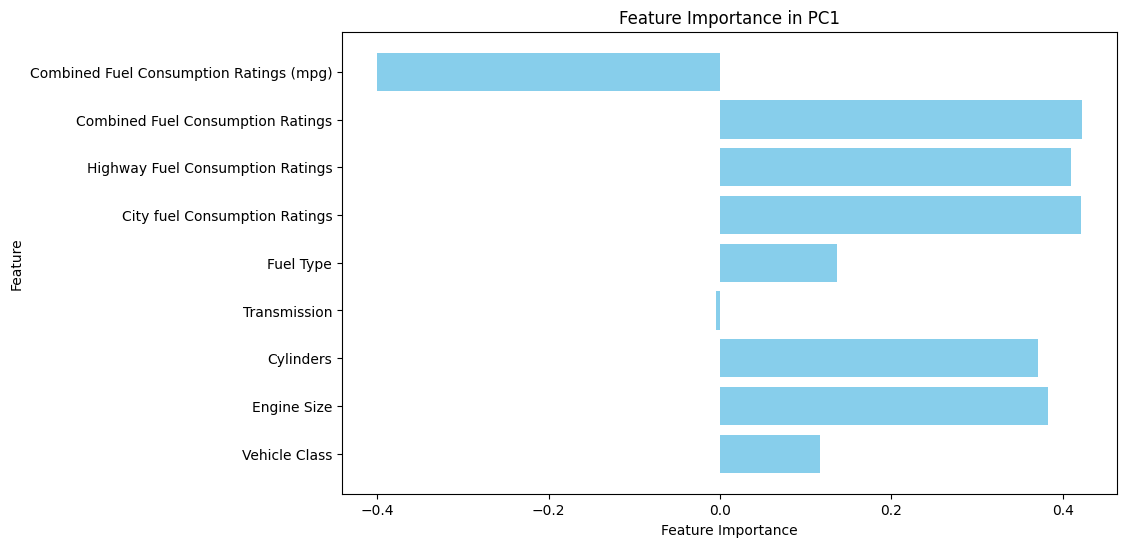

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(loadings.index, loadings['PC1'], color='skyblue')
categories = ['Vehicle Class','Engine Size', 'Cylinders', 'Transmission','Fuel Type','City fuel Consumption Ratings', 'Highway Fuel Consumption Ratings', 'Combined Fuel Consumption Ratings',\
          'Combined Fuel Consumption Ratings (mpg)']
plt.yticks(ticks = range(len(categories)), labels = categories)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in PC1')
plt.show()


### Interpretation

The horizontal bar graph displays the feature importance of the first principal component (PC1) from a Principal Component Analysis (PCA) performed on a set of features measured for lightweight vehicles and light trucks. The target variable for the analysis is CO2 emissions of the vehicles. Here’s a detailed interpretation of the results:

Key Features and Their Importances
---

Combined Fuel Consumption Ratings (mpg):

Importance: This feature has the highest absolute loading (negative).

Interpretation: As the combined fuel consumption rating in miles per gallon (mpg) increases, the value of PC1 decreases. This suggests that vehicles with higher mpg (which indicates better fuel efficiency) are associated with lower CO2 emissions.

---

Combined Fuel Consumption Ratings:

Importance: This feature has the second-highest absolute loading (positive).

Interpretation: As the combined fuel consumption rating in liters per 100 kilometers (L/100 km) increases, the value of PC1 increases. This implies that higher fuel consumption is strongly correlated with higher CO2 emissions.

---

Highway Fuel Consumption Ratings:

Importance: This feature also has a significant positive loading.

Interpretation: Vehicles with higher highway fuel consumption ratings tend to have higher CO2 emissions, contributing positively to PC1.

---

City Fuel Consumption Ratings:

Importance: This feature has a notable positive loading.

Interpretation: Higher city fuel consumption ratings are associated with higher CO2 emissions, making this feature important for PC1.

---

Fuel Type:

Importance: This feature has a moderate positive loading.

Interpretation: Different fuel types impact CO2 emissions, with certain fuel types contributing more to higher emissions.

---

Transmission:

Importance: This feature has a minimal positive loading.

Interpretation: Transmission type has a relatively small influence on CO2 emissions compared to fuel consumption ratings.

---

Cylinders:

Importance: This feature has a positive loading.

Interpretation: The number of engine cylinders has some influence on CO2 emissions, but it is less critical than fuel consumption metrics.

---

Engine Size:

Importance: This feature has a positive loading.

Interpretation: Larger engine sizes are associated with higher CO2 emissions, but this feature is less influential than fuel consumption ratings.

---

Vehicle Class:

Importance: This feature has the lowest positive loading.

Interpretation: The vehicle class (lightweight vehicles vs. light trucks) has the least influence on CO2 emissions among all the features considered.

Summary of Interpretation
---

Dominant Features:

Combined Fuel Consumption Ratings (mpg) and Combined Fuel Consumption Ratings (L/100 km) are the most influential features for PC1. These features have the highest absolute loadings, indicating they play the most significant roles in explaining the variance in CO2 emissions.
The negative loading for mpg indicates that better fuel efficiency (higher mpg) is associated with lower CO2 emissions, while the positive loading for combined fuel consumption (L/100 km) indicates that higher fuel consumption is associated with higher CO2 emissions.

Significant but Less Dominant Features:

Highway Fuel Consumption Ratings and City Fuel Consumption Ratings also have strong positive loadings, indicating that higher fuel consumption in both city and highway driving conditions contributes to higher CO2 emissions.

Moderate Features:

Fuel Type has a moderate influence, suggesting that different types of fuel have varying impacts on CO2 emissions.

Minimal Influence Features:

Transmission, Cylinders, Engine Size, and Vehicle Class have smaller loadings, indicating that these features are less critical in explaining the variance in CO2 emissions compared to fuel consumption ratings.

---
---

Conclusion

The PCA results highlight the primary importance of fuel consumption ratings (combined, highway, and city) in explaining CO2 emissions for lightweight vehicles and light trucks. Features like fuel type, transmission, number of cylinders, engine size, and vehicle class are less influential. These insights can guide the focus on key factors affecting CO2 emissions, which are mainly related to fuel efficiency and consumption.


# MODEL BUILDING

## Splitting the Dataset

In [ ]:
#splitting the dataset in training and testing
from sklearn.model_selection import train_test_split
X_encoded_PCA = X_encoded.drop('transmission', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_encoded_PCA, y, test_size = 0.2, random_state = 42)

In [ ]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

In [ ]:
X_test

,class,engine_size,cylinders,fuel_type,city_fuel_cons_rating,hw_fuel_cons_rating,comb_fuel_cons_rating,comb_fuel_cons_rating_mpg
11072,13,3.5,6.0,1,12.3,8.5,10.6,27.0
8603,4,3.6,6.0,1,12.9,8.1,10.7,26.0
16987,4,2.0,4.0,2,9.3,7.0,8.3,34.0
19807,6,4.4,8.0,2,13.3,9.3,11.5,25.0
15755,5,2.5,4.0,1,8.6,6.1,7.4,38.0
...,...,...,...,...,...,...,...,...
5018,4,2.0,4.0,2,12.7,8.9,11.0,26.0
15258,10,2.7,6.0,1,13.1,10.2,11.8,24.0
4518,9,4.0,6.0,1,16.0,12.6,14.4,20.0
17903,15,3.5,6.0,1,13.8,11.4,12.7,22.0


## Lazy Predict

In [ ]:
!pip install LazyPredict

In [ ]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose = 0, custom_metric = None, ignore_warnings = False)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 76%|███████▌  | 32/42 [05:13<00:34,  3.42s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|█████████▊| 41/42 [05:38<00:02,  2.80s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 729
[LightGBM] [Info] Number of data points in the train set: 16371, number of used features: 8
[LightGBM] [Info] Start training from score 266.662024


100%|██████████| 42/42 [05:38<00:00,  8.07s/it]

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
XGBRegressor                                 1.00       1.00   2.04   
DecisionTreeRegressor                        1.00       1.00   2.04   
ExtraTreeRegressor                           1.00       1.00   2.16   
ExtraTreesRegressor                          1.00       1.00   2.18   
BaggingRegressor                             1.00       1.00   2.25   
RandomForestRegressor                        1.00       1.00   2.27   
LGBMRegressor                                1.00       1.00   2.36   
HistGradientBoostingRegressor                1.00       1.00   2.49   
KNeighborsRegressor                          1.00       1.00   3.10   
GradientBoostingRegressor                    1.00       1.00   3.27   
MLPRegressor                                 1.00       1.00   3.48   
SVR                                          0.96       0.96  11.97   
NuSVR 

## Dummy Regressor

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

dummy_reg = DummyRegressor(strategy = 'median')

dummy_reg.fit(X_train, y_train)

y_dummy_pred = dummy_reg.predict(X_test)
print(f"The training score is {dummy_reg.score(X_train, y_train)}\nThe testing score is {dummy_reg.score(X_test,y_test)}")

The training score is -0.007867820200414322
The testing score is -0.009236468668873954


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

lin_reg_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

lin_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [ ]:
print("intercepts : ", lin_reg_pipe[-1].intercept_)
print("wieght vector : ", lin_reg_pipe[-1].coef_)
print("Corresponding columns : ", X.columns)

intercepts :  [266.66202431]
wieght vector :  [[ -0.35969721   0.99499647  16.72301725  -6.82346972   0.60168448
    5.22855571  20.32938117 -22.88700876]]
Corresponding columns :  Index(['class', 'engine_size', 'cylinders', 'transmission', 'fuel_type',
       'city_fuel_cons_rating', 'hw_fuel_cons_rating', 'comb_fuel_cons_rating',
       'comb_fuel_cons_rating_mpg'],
      dtype='object')


In [ ]:
y_lin_pred = lin_reg_pipe.predict(X_test)

In [ ]:
test_score = lin_reg_pipe.score(X_test, y_test)
print ("Model performance on test set: ", test_score)

train_score = lin_reg_pipe.score(X_train, y_train)
print ("Model performance on train set: ", train_score)

Model performance on test set:  0.9084460144385527
Model performance on train set:  0.9059312346582886


In [ ]:
print(f"the root mean squared error for test dataset is : {sqrt(mean_squared_error(y_test,y_lin_pred))}")

the root mean squared error for test dataset is : 18.787910146873354


In [ ]:
X_train.shape[0]

16371

## Stochastic Gradient Regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

sgd_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('sgd_reg', SGDRegressor(learning_rate = 'adaptive', eta0 = 1e-2, average = True))
])

param_grid = {'sgd_reg__penalty' : ['l1', 'l2'],
              'sgd_reg__alpha' : [0.0001, 0.001],
              'poly__degree' : [1,2]}

scoring = {'neg_mean_squared_error' : 'neg_mean_squared_error',
           'neg_mean_absolute_error' : 'neg_mean_absolute_error'}

sgd_grid = GridSearchCV(sgd_pipe,
                        param_grid,
                        scoring = scoring,
                        n_jobs = -1,
                        refit = 'neg_mean_squared_error',
                        cv = 5,
                        return_train_score = True)

sgd_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('sgd_reg',
                                        SGDRegressor(average=True,
                                                     learning_rate='adaptive'))]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2],
                         'sgd_reg__alpha': [0.0001, 0.001],
                         'sgd_reg__penalty': ['l1', 'l2']},
             refit='neg_mean_squared_error', return_train_score=True,
             scoring={'neg_mean_absolute_error': 'neg_mean_absolute_error',
                      'neg_mean_squared_error': 'neg_mean_squared_error'})

In [ ]:
sgd_grid.best_params_

{'poly__degree': 1, 'sgd_reg__alpha': 0.001, 'sgd_reg__penalty': 'l2'}

In [ ]:
from math import sqrt
y_sgd_pred = sgd_grid.predict(X_test)
print(f"Training score:", sqrt(-1*sgd_grid.score(X_train,y_train)))
print(f"Testing score:", sqrt(-1*sgd_grid.score(X_test,y_test)))

Training score: 19.578524915642202
Testing score: 18.787145524787416


In [ ]:
print(f"Testing R2 Score: {r2_score(y_test, y_sgd_pred)}")

Testing R2 Score: 0.908453466334412


## RidgeCV regressor

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_pipe = Pipeline([
    ('std_scaler', StandardScaler()),
    ('ridge_reg', RidgeCV(fit_intercept = True))
])

param_grid = {'ridge_reg__alphas' : [0.01,0.1,5,10]}
ridge_grid = GridSearchCV(ridge_pipe,
                          param_grid,
                          scoring = "neg_root_mean_squared_error",
                          refit = True,
                          n_jobs = -1,
                          return_train_score = True)
ridge_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('ridge_reg', RidgeCV())]),
             n_jobs=-1, param_grid={'ridge_reg__alphas': [0.01, 0.1, 5, 10]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_grid.best_params_

{'ridge_reg__alphas': 5}

In [ ]:
y_ridge_pred = ridge_grid.predict(X_test)

In [ ]:
print(f"Training score is : {sqrt(-1*ridge_grid.score(X_train,y_train))}")
print(f"Testing score is : {sqrt(-1*ridge_grid.score(X_test,y_test))}")

Training score is : 4.4247325941254845
Testing score is : 4.334385507956323


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtc_pipe = Pipeline([('scaler', StandardScaler()),
                    ('dtc_reg', DecisionTreeRegressor())])

param_grid = {'dtc_reg__max_depth' : [2,5,8,10],
              'dtc_reg__min_samples_split' : [2,3,4],
              'dtc_reg__criterion' : ['squared_error', 'absolute_error'],
              'dtc_reg__splitter' : ['best', 'random'],
              'dtc_reg__min_impurity_decrease' : [0, 0.01, 0.1]}

dtc_grid = GridSearchCV(dtc_pipe,
                        param_grid,
                        scoring = 'neg_root_mean_squared_error',
                        return_train_score = True,
                        n_jobs = -1,
                        refit = True)

dtc_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dtc_reg', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'dtc_reg__criterion': ['squared_error',
                                                'absolute_error'],
                         'dtc_reg__max_depth': [2, 5, 8, 10],
                         'dtc_reg__min_impurity_decrease': [0, 0.01, 0.1],
                         'dtc_reg__min_samples_split': [2, 3, 4],
                         'dtc_reg__splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
dtc_grid.best_params_

{'dtc_reg__criterion': 'squared_error',
 'dtc_reg__max_depth': 10,
 'dtc_reg__min_impurity_decrease': 0,
 'dtc_reg__min_samples_split': 2,
 'dtc_reg__splitter': 'best'}

In [ ]:
y_dtc_pred = dtc_grid.predict(X_test)

print("The training score is: ", sqrt(-1*dtc_grid.score(X_train, y_train)))
print("The testing score is: ", sqrt(-1*dtc_grid.score(X_test,y_test)))

The training score is:  1.4887362072116133
The testing score is:  1.5526806285366603


In [ ]:
print("The r2 score is: ", r2_score(y_test, y_dtc_pred))

The r2 score is:  0.9984925294212588


In [ ]:
best_model = dtc_grid.best_estimator_
best_dtc = best_model[-1]

importances = best_dtc.feature_importances_
feature_imp_df = pd.DataFrame({
    'Features' : X_train.columns,
    'Importance' : importances
})

feature_imp_df = feature_imp_df.sort_values(by = 'Importance', ascending = False)

feature_imp_df

,Features,Importance
6,comb_fuel_cons_rating,0.84
7,comb_fuel_cons_rating_mpg,0.10
3,fuel_type,0.05
1,engine_size,0.00
4,city_fuel_cons_rating,0.00
5,hw_fuel_cons_rating,0.00
0,class,0.00
2,cylinders,0.00


Conclusion

Key Features: The comb_fuel_cons_rating is the most important feature, followed by comb_fuel_cons_rating_mpg and fuel_type. This aligns with the understanding that fuel consumption metrics are crucial in determining CO2 emissions.

Less Influential Features: Features like engine_size, city_fuel_cons_rating, hw_fuel_cons_rating, class, and cylinders are not significant in the decision tree model for predicting CO2 emissions.

Model Focus: The model relies heavily on fuel consumption ratings, indicating that these metrics are strong predictors of CO2 emissions for lightweight vehicles.
